<left><a href="https://ubiqum.com/programs/data-analytics-and-machine-learning-program/"><img src = "https://scontent-ber1-1.cdninstagram.com/vp/706a70a2cf2361d0b5c0c9335e9d06d1/5D6D4095/t51.2885-19/s320x320/22352400_125994984820756_7444932873942990848_n.jpg?_nc_ht=scontent-ber1-1.cdninstagram.com" width = 40> </a></left>

<h1 align=center>IoT - Analytics</h1>
<h2 align=center>Deep Analytics, Visualitzation and Modelling</h2>

<h3 align=left><font color = #277a9a>Task 3: <font color = black>Evaluate Techniques for Wifi Locationing - Part 2</h3>

### Index:

* [001 - Library import](#library_import)

* [002 - Data loading](#data_loading)

* [003 - Data modeling](#data_modeling)

### 001 - Library import <a id='library_import'></a>

In [1]:
import numpy as np
print ('Numpy: ', np.__version__)
import pandas as pd
print ('Pandas: ', pd.__version__)

%matplotlib inline

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
print ('Matplotlib: ', mpl.__version__)

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import neighbors
print ('scikit-learn: ', sk.__version__)

import math as math
from math import sqrt

import timeit

Numpy:  1.15.4
Pandas:  0.23.4
Matplotlib:  3.0.2
scikit-learn:  0.21.0


### 002 - Data loading  <a id='data_loading'></a>

In [2]:
df_train_clean = pd.read_csv("trainingData_clean.csv")
df_valid_clean = pd.read_csv("validationData_clean.csv")
print('Loading data...')
print ()
print ('dimensions (rows, column)')
print ('train:', df_train_clean.shape)
print ('valid:', df_valid_clean.shape)
print ()
print (df_train_clean.info())
print ()
print('...into the dataframe - ready!')

Loading data...

dimensions (rows, column)
train: (12373, 396)
valid: (1109, 379)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12373 entries, 0 to 12372
Columns: 396 entries, WAP001 to ABSOLUTE_LATITUDE
dtypes: float64(4), int64(391), object(1)
memory usage: 37.4+ MB
None

...into the dataframe - ready!


In [3]:
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0,0,0,0,0,0,0,0,0,0,...,2,1,106,2,2,23,2013-06-20 07:35:33,17,150.0741,175.033184
1,0,0,0,0,0,0,0,0,0,0,...,2,1,106,2,2,23,2013-06-20 07:34:51,16,154.7172,188.480184
2,0,0,0,0,0,8,0,0,0,0,...,2,1,103,2,2,23,2013-06-20 07:41:35,15,172.1860,203.787184
3,0,0,0,0,0,0,0,0,0,0,...,2,1,102,2,2,23,2013-06-20 07:36:47,16,166.7680,188.347984
4,0,0,0,0,0,0,0,0,0,0,...,2,1,105,2,2,23,2013-06-20 07:37:21,15,157.4422,193.513284


In [4]:
df_valid_clean.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,2013-10-04 07:45:03,1,180.021956,141.647431
1,0,0,0,0,0,0,18,18,0,0,...,4,2,0,0,0,13,2013-10-07 14:10:54,12,312.071534,91.724822
2,0,0,0,0,0,0,32,33,0,0,...,4,2,0,0,0,13,2013-10-07 14:11:35,10,321.636675,98.518237
3,0,0,0,0,0,0,28,30,0,0,...,4,2,0,0,0,13,2013-10-07 14:12:18,10,330.113872,94.813768
4,0,0,0,0,0,0,0,0,26,26,...,2,0,0,0,0,2,2013-10-04 09:09:34,14,54.439452,174.383692


### 003 - Data modeling <a id='data_modeling'></a>

In [5]:
# remove unnecessary colums
print ('remove unnecessary colums')
print ('dimensions (rows, column)')
# Training dataset
df_train = df_train_clean.drop(['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'WAP_COUNT'], axis=1)
print ('train:', df_train.shape)
# Test dataset
df_valid = df_valid_clean.drop(['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'WAP_COUNT'], axis=1)
print ('test:', df_valid.shape)

remove unnecessary colums
dimensions (rows, column)
train: (12373, 388)
test: (1109, 371)


Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

#### KNN_ALL - Splitting

In [6]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_ALL_FL = df_train.iloc[:, :-4].values
y_KNN_ALL_FL = df_train.iloc[:, 384].values

X_KNN_ALL_BLDG = df_train.iloc[:, :-4].values
y_KNN_ALL_BLDG = df_train.iloc[:, 385].values

X_KNN_ALL_LON = df_train.iloc[:, :-4].values
y_KNN_ALL_LON = df_train.iloc[:, 386].values

X_KNN_ALL_LAT = df_train.iloc[:, :-4].values
y_KNN_ALL_LAT = df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_ALL_FL_train, X_KNN_ALL_FL_test, y_KNN_ALL_FL_train, y_KNN_ALL_FL_test = train_test_split(X_KNN_ALL_FL, y_KNN_ALL_FL, test_size=0.3, random_state=0)
X_KNN_ALL_BLDG_train, X_KNN_ALL_BLDG_test, y_KNN_ALL_BLDG_train, y_KNN_ALL_BLDG_test = train_test_split(X_KNN_ALL_BLDG, y_KNN_ALL_BLDG, test_size=0.3, random_state=0)
X_KNN_ALL_LON_train, X_KNN_ALL_LON_test, y_KNN_ALL_LON_train, y_KNN_ALL_LON_test = train_test_split(X_KNN_ALL_LON, y_KNN_ALL_LON, test_size=0.3, random_state=0)
X_KNN_ALL_LAT_train, X_KNN_ALL_LAT_test, y_KNN_ALL_LAT_train, y_KNN_ALL_LAT_test = train_test_split(X_KNN_ALL_LAT, y_KNN_ALL_LAT, test_size=0.3, random_state=0)

#### KNN_ALL - FLOOR

In [7]:
KNN_ALL_FL_start = timeit.default_timer()

KNN_ALL_FL_rmse_val = [] # to store rmse values for different k
KNN_ALL_FL_r2_val = [] # to store r2 values for different k

for KNN_ALL_FL in range(10):
    KNN_ALL_FL = KNN_ALL_FL + 1
    KNN_ALL_FL_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_ALL_FL)

    KNN_ALL_FL_model.fit(X_KNN_ALL_FL_train, y_KNN_ALL_FL_train)  #fit the model
    KNN_ALL_FL_pred = KNN_ALL_FL_model.predict(X_KNN_ALL_FL_test) #make prediction on test set
    KNN_ALL_FL_error = sqrt(mean_squared_error(y_KNN_ALL_FL_test, KNN_ALL_FL_pred)) #calculate rmse
    KNN_ALL_FL_r2 = r2_score(y_KNN_ALL_FL_test, KNN_ALL_FL_pred)
    KNN_ALL_FL_rmse_val.append(KNN_ALL_FL_error) #store rmse values
    KNN_ALL_FL_r2_val.append(KNN_ALL_FL_r2) #store r2 values

    print('Value (KNN_ALL_FL) for k=',KNN_ALL_FL,'is:')    
    print('RMSE   :', KNN_ALL_FL_error)
    print('Rsqaure:', KNN_ALL_FL_r2)

KNN_ALL_FL_stop = timeit.default_timer()
print ()
KNN_ALL_FL_t = (KNN_ALL_FL_stop - KNN_ALL_FL_start)/60
print('Time in min: ', round(KNN_ALL_FL_t, 3))

Value (KNN_ALL_FL) for k= 1 is:
RMSE   : 0.16818631909591958
Rsqaure: 0.9813162665302457
Value (KNN_ALL_FL) for k= 2 is:
RMSE   : 0.11459965923401223
Rsqaure: 0.9913254094604712
Value (KNN_ALL_FL) for k= 3 is:
RMSE   : 0.1299314585004185
Rsqaure: 0.988849073357734
Value (KNN_ALL_FL) for k= 4 is:
RMSE   : 0.1426164073841871
Rsqaure: 0.9865655059336529
Value (KNN_ALL_FL) for k= 5 is:
RMSE   : 0.12961315120587588
Rsqaure: 0.9889036417221536
Value (KNN_ALL_FL) for k= 6 is:
RMSE   : 0.1246703027467776
Rsqaure: 0.9897338321648996
Value (KNN_ALL_FL) for k= 7 is:
RMSE   : 0.13259807093848697
Rsqaure: 0.9883866706246309
Value (KNN_ALL_FL) for k= 8 is:
RMSE   : 0.1337048495738616
Rsqaure: 0.9881919916598145
Value (KNN_ALL_FL) for k= 9 is:
RMSE   : 0.13952202433517416
Rsqaure: 0.9871421643740774
Value (KNN_ALL_FL) for k= 10 is:
RMSE   : 0.14771061818345332
Rsqaure: 0.9855886135836629

Time in min:  2.4


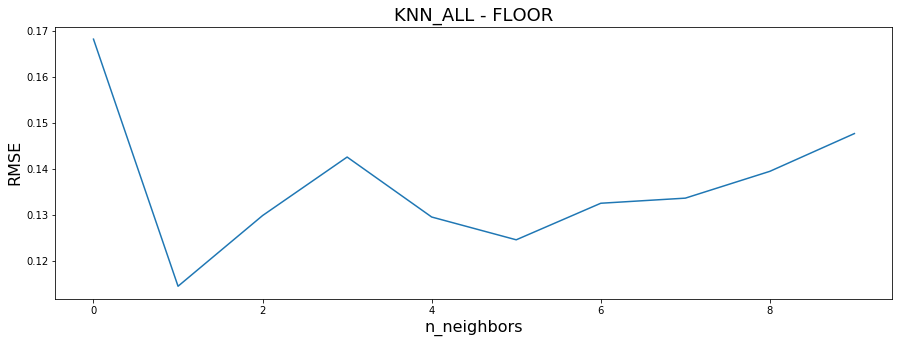

In [8]:
# plotting the rmse values against k values
KNN_ALL_FL_curveRMSE = pd.DataFrame(KNN_ALL_FL_rmse_val)
KNN_ALL_FL_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_FL_RMSE.png', bbox_inches='tight')

plt.show()

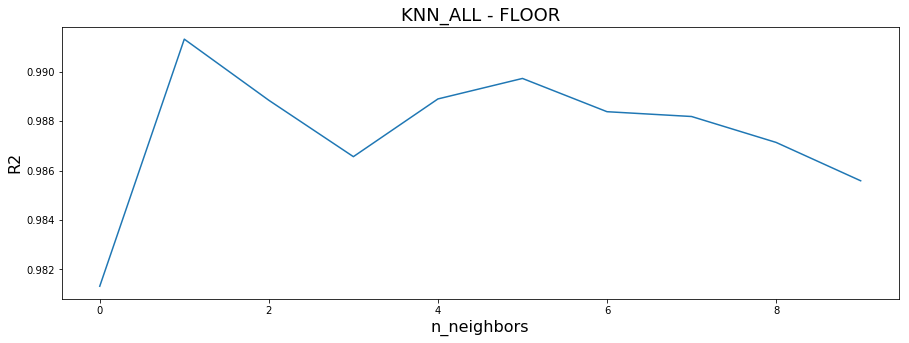

In [9]:
# plotting the r2 values against k values
KNN_ALL_FL_curveR2 = pd.DataFrame(KNN_ALL_FL_r2_val)
KNN_ALL_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_ALL_FL_r2.png', bbox_inches='tight')

plt.show()

#### KNN_ALL - BUILDINGID

In [10]:
KNN_ALL_BLDG_start = timeit.default_timer()

KNN_ALL_BLDG_rmse_val = [] # to store rmse values for different k
KNN_ALL_BLDG_r2_val = [] # to store r2 values for different k

for KNN_ALL_BLDG in range(10):
    KNN_ALL_BLDG = KNN_ALL_BLDG + 1
    KNN_ALL_BLDG_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_ALL_BLDG)

    KNN_ALL_BLDG_model.fit(X_KNN_ALL_BLDG_train, y_KNN_ALL_BLDG_train)  #fit the model
    KNN_ALL_BLDG_pred = KNN_ALL_BLDG_model.predict(X_KNN_ALL_BLDG_test) #make prediction on test set
    KNN_ALL_BLDG_error = sqrt(mean_squared_error(y_KNN_ALL_BLDG_test, KNN_ALL_BLDG_pred)) #calculate rmse
    KNN_ALL_BLDG_r2 = r2_score(y_KNN_ALL_BLDG_test, KNN_ALL_BLDG_pred)
    KNN_ALL_BLDG_rmse_val.append(KNN_ALL_BLDG_error) #store rmse values
    KNN_ALL_BLDG_r2_val.append(KNN_ALL_BLDG_r2) #store r2 values

    print('Value (KNN_ALL_BLDG) for k=',KNN_ALL_BLDG,'is:')    
    print('RMSE   :', KNN_ALL_BLDG_error)
    print('Rsqaure:', KNN_ALL_BLDG_r2)

KNN_ALL_BLDG_stop = timeit.default_timer()
print ()
KNN_ALL_BLDG_t = (KNN_ALL_BLDG_stop - KNN_ALL_BLDG_start)/60
print('Time in min: ', round(KNN_ALL_BLDG_t, 3))

Value (KNN_ALL_BLDG) for k= 1 is:
RMSE   : 0.05443677129446159
Rsqaure: 0.9956228099711857
Value (KNN_ALL_BLDG) for k= 2 is:
RMSE   : 0.034817875908197224
Rsqaure: 0.9982093313518487
Value (KNN_ALL_BLDG) for k= 3 is:
RMSE   : 0.03907147885312399
Rsqaure: 0.9977450839245502
Value (KNN_ALL_BLDG) for k= 4 is:
RMSE   : 0.04283998142647461
Rsqaure: 0.9972891266298821
Value (KNN_ALL_BLDG) for k= 5 is:
RMSE   : 0.03870200030471561
Rsqaure: 0.9977875294036175
Value (KNN_ALL_BLDG) for k= 6 is:
RMSE   : 0.037408092994109424
Rsqaure: 0.9979329935975043
Value (KNN_ALL_BLDG) for k= 7 is:
RMSE   : 0.039584066378387114
Rsqaure: 0.997685530318716
Value (KNN_ALL_BLDG) for k= 8 is:
RMSE   : 0.0400468643839035
Rsqaure: 0.9976310946008832
Value (KNN_ALL_BLDG) for k= 9 is:
RMSE   : 0.04269173313805853
Rsqaure: 0.9973078561887876
Value (KNN_ALL_BLDG) for k= 10 is:
RMSE   : 0.04586923880952808
Rsqaure: 0.9968921950795419

Time in min:  2.343


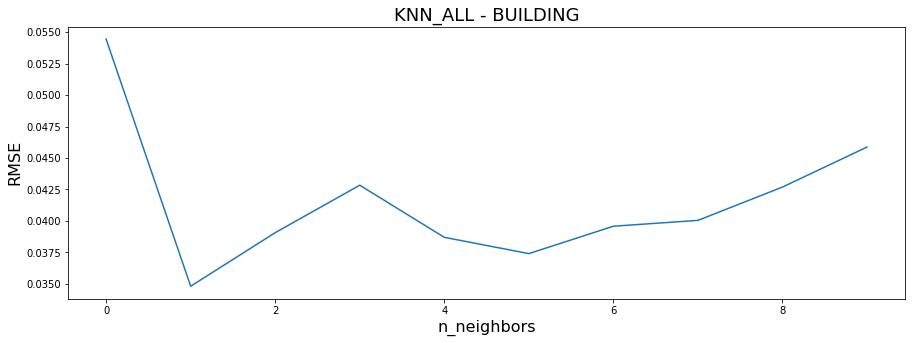

In [11]:
# plotting the rmse values against k values
KNN_ALL_BLDG_curveRMSE = pd.DataFrame(KNN_ALL_BLDG_rmse_val)
KNN_ALL_BLDG_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - BUILDING', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_ALL_BLDG_RMSE.png', bbox_inches='tight')

plt.show()

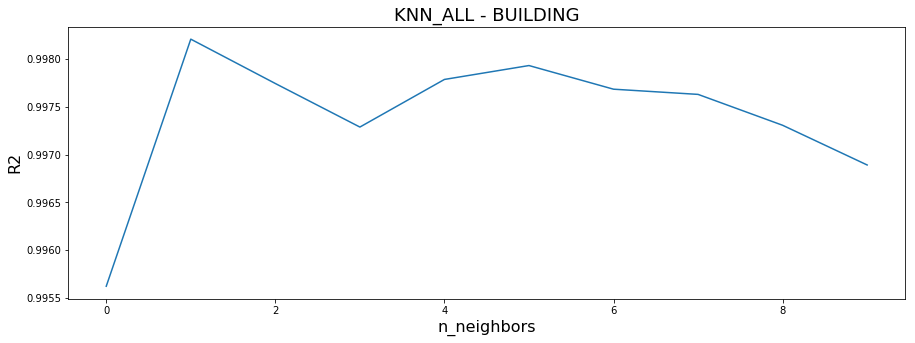

In [12]:
# plotting the r2 values against k values
KNN_ALL_BLDG_curveR2 = pd.DataFrame(KNN_ALL_BLDG_r2_val)
KNN_ALL_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_ALL_BLDG_r2.png', bbox_inches='tight')

plt.show()

#### KNN_ALL - ABSOLUTE_LONGITUDE

In [13]:
KNN_ALL_LON_start = timeit.default_timer()

KNN_ALL_LON_rmse_val = [] # to store rmse values for different k
KNN_ALL_LON_r2_val = [] # to store r2 values for different k

for KNN_ALL_LON in range(10):
    KNN_ALL_LON = KNN_ALL_LON + 1
    KNN_ALL_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_ALL_LON)

    KNN_ALL_LON_model.fit(X_KNN_ALL_LON_train, y_KNN_ALL_LON_train)  #fit the model
    KNN_ALL_LON_pred = KNN_ALL_LON_model.predict(X_KNN_ALL_LON_test) #make prediction on test set
    KNN_ALL_LON_error = sqrt(mean_squared_error(y_KNN_ALL_LON_test, KNN_ALL_LON_pred)) #calculate rmse
    KNN_ALL_LON_r2 = r2_score(y_KNN_ALL_LON_test, KNN_ALL_LON_pred)
    KNN_ALL_LON_rmse_val.append(KNN_ALL_LON_error) #store rmse values
    KNN_ALL_LON_r2_val.append(KNN_ALL_LON_r2) #store r2 values

    print('Value (KNN_ALL_LON) for k=',KNN_ALL_LON,'is:')    
    print('RMSE   :', KNN_ALL_LON_error)
    print('Rsqaure:', KNN_ALL_LON_r2)

KNN_ALL_LON_stop = timeit.default_timer()
print ()
KNN_ALL_LON_t = (KNN_ALL_LON_stop - KNN_ALL_LON_start)/60
print('Time in min: ', round(KNN_ALL_LON_t, 3))

Value (KNN_ALL_LON) for k= 1 is:
RMSE   : 12.40004938876452
Rsqaure: 0.9894430844022956
Value (KNN_ALL_LON) for k= 2 is:
RMSE   : 7.192002106577734
Rsqaure: 0.9964486798021364
Value (KNN_ALL_LON) for k= 3 is:
RMSE   : 8.234528375522181
Rsqaure: 0.9953444855348942
Value (KNN_ALL_LON) for k= 4 is:
RMSE   : 8.133364684083107
Rsqaure: 0.9954581717130075
Value (KNN_ALL_LON) for k= 5 is:
RMSE   : 7.153360854495266
Rsqaure: 0.9964867384146102
Value (KNN_ALL_LON) for k= 6 is:
RMSE   : 7.126605827320252
Rsqaure: 0.9965129698955509
Value (KNN_ALL_LON) for k= 7 is:
RMSE   : 7.4473437087730145
Rsqaure: 0.996192034411571
Value (KNN_ALL_LON) for k= 8 is:
RMSE   : 7.74500171051066
Rsqaure: 0.9958815551423413
Value (KNN_ALL_LON) for k= 9 is:
RMSE   : 8.138567138867533
Rsqaure: 0.9954523595518222
Value (KNN_ALL_LON) for k= 10 is:
RMSE   : 8.738173349620185
Rsqaure: 0.9947575833813909

Time in min:  2.204


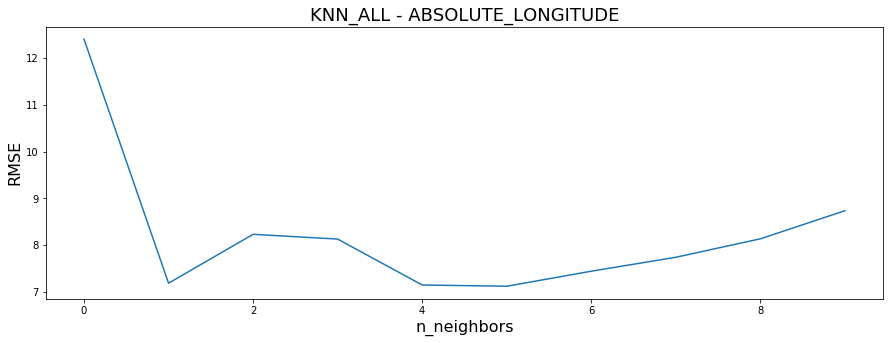

In [14]:
# plotting the rmse values against k values
KNN_ALL_LON_curveRMSE = pd.DataFrame(KNN_ALL_LON_rmse_val)
KNN_ALL_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_ALL_LON_RMSE.png', bbox_inches='tight')

plt.show()

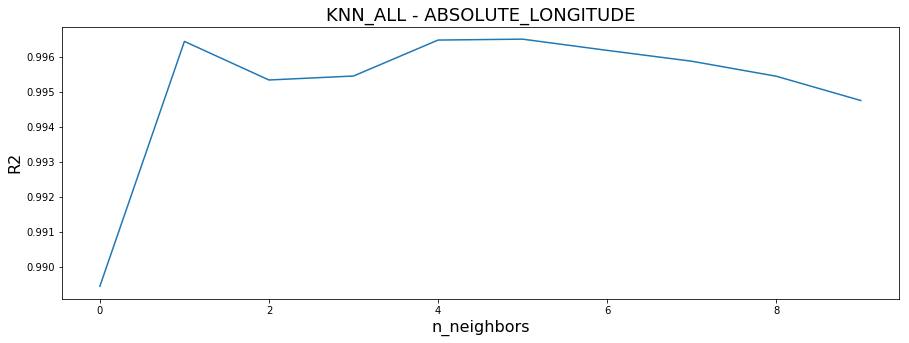

In [15]:
# plotting the r2 values against k values
KNN_ALL_LON_curveR2 = pd.DataFrame(KNN_ALL_LON_r2_val)
KNN_ALL_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/06_KNN_ALL_LON_r2.png', bbox_inches='tight')

plt.show()

#### KNN_ALL - ABSOLUTE_LATITUDE

In [16]:
KNN_ALL_LAT_start = timeit.default_timer()

KNN_ALL_LAT_rmse_val = [] # to store rmse values for different k
KNN_ALL_LAT_r2_val = [] # to store r2 values for different k

for KNN_ALL_LAT in range(10):
    KNN_ALL_LAT = KNN_ALL_LAT + 1
    KNN_ALL_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_ALL_LAT)

    KNN_ALL_LAT_model.fit(X_KNN_ALL_LAT_train, y_KNN_ALL_LAT_train)  #fit the model
    KNN_ALL_LAT_pred = KNN_ALL_LAT_model.predict(X_KNN_ALL_LAT_test) #make prediction on test set
    KNN_ALL_LAT_error = sqrt(mean_squared_error(y_KNN_ALL_LAT_test, KNN_ALL_LAT_pred)) #calculate rmse
    KNN_ALL_LAT_r2 = r2_score(y_KNN_ALL_LAT_test, KNN_ALL_LAT_pred)
    KNN_ALL_LAT_rmse_val.append(KNN_ALL_LAT_error) #store rmse values
    KNN_ALL_LAT_r2_val.append(KNN_ALL_LAT_r2) #store r2 values

    print('Value (KNN_ALL_LAT) for k=',KNN_ALL_LAT,'is:')    
    print('RMSE   :', KNN_ALL_LAT_error)
    print('Rsqaure:', KNN_ALL_LAT_r2)

KNN_ALL_LAT_stop = timeit.default_timer()
print ()
KNN_ALL_LAT_t = (KNN_ALL_LAT_stop - KNN_ALL_LAT_start)/60
print('Time in min: ', round(KNN_ALL_LAT_t, 3))

Value (KNN_ALL_LAT) for k= 1 is:
RMSE   : 7.021151988666125
Rsqaure: 0.9895457706494253
Value (KNN_ALL_LAT) for k= 2 is:
RMSE   : 4.747425882756457
Rsqaure: 0.9952203988026872
Value (KNN_ALL_LAT) for k= 3 is:
RMSE   : 5.002283246946588
Rsqaure: 0.9946934552183146
Value (KNN_ALL_LAT) for k= 4 is:
RMSE   : 5.358319301154859
Rsqaure: 0.9939111895549925
Value (KNN_ALL_LAT) for k= 5 is:
RMSE   : 5.332873693685134
Rsqaure: 0.9939688813786773
Value (KNN_ALL_LAT) for k= 6 is:
RMSE   : 5.275566221432895
Rsqaure: 0.9940978066483653
Value (KNN_ALL_LAT) for k= 7 is:
RMSE   : 5.552720065924542
Rsqaure: 0.9934613689279487
Value (KNN_ALL_LAT) for k= 8 is:
RMSE   : 5.647900351273077
Rsqaure: 0.9932352877763106
Value (KNN_ALL_LAT) for k= 9 is:
RMSE   : 5.966960552271941
Rsqaure: 0.9924493974871749
Value (KNN_ALL_LAT) for k= 10 is:
RMSE   : 6.286067221557551
Rsqaure: 0.9916202064984634

Time in min:  2.007


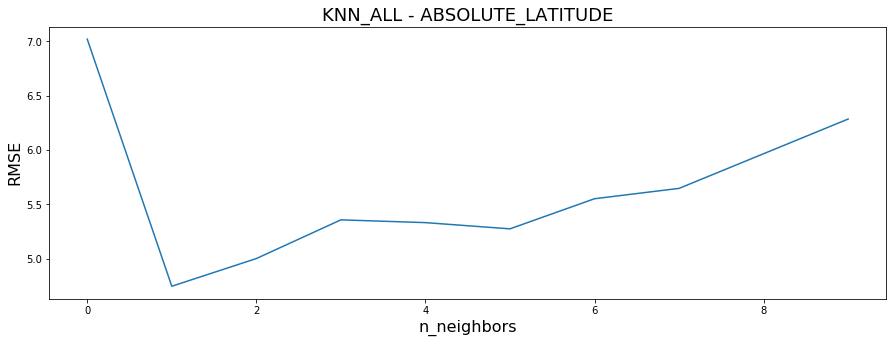

In [17]:
# plotting the rmse values against k values
KNN_ALL_LAT_curveRMSE = pd.DataFrame(KNN_ALL_LAT_rmse_val)
KNN_ALL_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/07_KNN_ALL_LAT_RMSE.png', bbox_inches='tight')

plt.show()

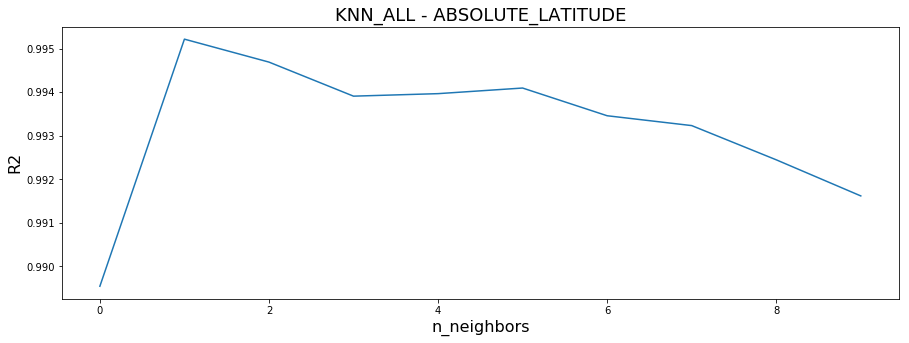

In [18]:
# plotting the r2 values against k values
KNN_ALL_LAT_curveR2 = pd.DataFrame(KNN_ALL_LAT_r2_val)
KNN_ALL_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/08_KNN_ALL_LAT_r2.png', bbox_inches='tight')

plt.show()

#### KNN - individual by Building and Floor

In [19]:
# Create subset for each building and floor (validationData)

# Training Data
print ('Create subset for each Building (BLDG) and Floor (FL) - validationData')
print ()
print ('dimensions (rows, column)')
# Building 00
BLDG00_df_train = df_train[(df_train.BUILDINGID == 0)]
BLDG00_FL00_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 0)]
BLDG00_FL01_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 1)]
BLDG00_FL02_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 2)]
BLDG00_FL03_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 3)]
# Building 01
BLDG01_df_train = df_train[(df_train.BUILDINGID == 1)]
BLDG01_FL00_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 0)]
BLDG01_FL01_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 1)]
BLDG01_FL02_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 2)]
BLDG01_FL03_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 3)]
# Building 02
BLDG02_df_train = df_train[(df_train.BUILDINGID == 2)]
BLDG02_FL00_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 0)]
BLDG02_FL01_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 1)]
BLDG02_FL02_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 2)]
BLDG02_FL03_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 3)]
BLDG02_FL04_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 4)]

# Floor
FL00_df_train = df_train[(df_train.FLOOR == 0)]
FL01_df_train = df_train[(df_train.FLOOR == 1)]
FL02_df_train = df_train[(df_train.FLOOR == 2)]
FL03_df_train = df_train[(df_train.FLOOR == 3)]
FL04_df_train = df_train[(df_train.FLOOR == 4)]

print ('BLDG00:', BLDG00_df_train.shape)
print ('BLDG00_FL00:', BLDG00_FL00_df_train.shape)
print ('BLDG00_FL01:', BLDG00_FL01_df_train.shape)
print ('BLDG00_FL02:', BLDG00_FL02_df_train.shape)
print ('BLDG00_FL03:', BLDG00_FL03_df_train.shape)
print ()
print ('BLDG01:', BLDG01_df_train.shape)
print ('BLDG01_FL00:', BLDG01_FL00_df_train.shape)
print ('BLDG01_FL01:', BLDG01_FL01_df_train.shape)
print ('BLDG01_FL02:', BLDG01_FL02_df_train.shape)
print ('BLDG01_FL03:', BLDG01_FL03_df_train.shape)
print ()
print ('BLDG02:', BLDG02_df_train.shape)
print ('BLDG02_FL00:', BLDG02_FL00_df_train.shape)
print ('BLDG02_FL01:', BLDG02_FL01_df_train.shape)
print ('BLDG02_FL02:', BLDG02_FL02_df_train.shape)
print ('BLDG02_FL03:', BLDG02_FL03_df_train.shape)
print ('BLDG02_FL04:', BLDG02_FL04_df_train.shape)
print ()
print ('FL00:', FL00_df_train.shape)
print ('FL01:', FL01_df_train.shape)
print ('FL02:', FL02_df_train.shape)
print ('FL03:', FL03_df_train.shape)
print ('FL04:', FL04_df_train.shape)

Create subset for each Building (BLDG) and Floor (FL) - validationData

dimensions (rows, column)
BLDG00: (2734, 388)
BLDG00_FL00: (526, 388)
BLDG00_FL01: (757, 388)
BLDG00_FL02: (733, 388)
BLDG00_FL03: (718, 388)

BLDG01: (2938, 388)
BLDG01_FL00: (175, 388)
BLDG01_FL01: (424, 388)
BLDG01_FL02: (1396, 388)
BLDG01_FL03: (943, 388)

BLDG02: (6701, 388)
BLDG02_FL00: (1942, 388)
BLDG02_FL01: (1145, 388)
BLDG02_FL02: (792, 388)
BLDG02_FL03: (2095, 388)
BLDG02_FL04: (727, 388)

FL00: (2643, 388)
FL01: (2326, 388)
FL02: (2921, 388)
FL03: (3756, 388)
FL04: (727, 388)


In [20]:
# Create subset for each building and floor (trainingData)

# Test Data
print ('Create subset for each Building (BLDG) and Floor (FL) - trainingData')
print ()
print ('dimensions (rows, column)')
# Building 00
BLDG00_df_valid = df_valid[(df_valid.BUILDINGID == 0)]
BLDG00_FL00_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 0)]
BLDG00_FL01_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 1)]
BLDG00_FL02_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 2)]
BLDG00_FL03_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 3)]
# Building 01
BLDG01_df_valid = df_valid[(df_valid.BUILDINGID == 1)]
BLDG01_FL00_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 0)]
BLDG01_FL01_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 1)]
BLDG01_FL02_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 2)]
BLDG01_FL03_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 3)]
# Building 02
BLDG02_df_valid = df_valid[(df_valid.BUILDINGID == 2)]
BLDG02_FL00_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 0)]
BLDG02_FL01_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 1)]
BLDG02_FL02_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 2)]
BLDG02_FL03_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 3)]
BLDG02_FL04_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 4)]

# Floor
FL00_df_valid = df_valid[(df_valid.FLOOR == 0)]
FL01_df_valid = df_valid[(df_valid.FLOOR == 1)]
FL02_df_valid = df_valid[(df_valid.FLOOR == 2)]
FL03_df_valid = df_valid[(df_valid.FLOOR == 3)]
FL04_df_valid = df_valid[(df_valid.FLOOR == 4)]

print ('BLDG00:', BLDG00_df_valid.shape)
print ('BLDG00_FL00:', BLDG00_FL00_df_valid.shape)
print ('BLDG00_FL01:', BLDG00_FL01_df_valid.shape)
print ('BLDG00_FL02:', BLDG00_FL02_df_valid.shape)
print ('BLDG00_FL03:', BLDG00_FL03_df_valid.shape)
print ()
print ('BLDG01:', BLDG01_df_valid.shape)
print ('BLDG01_FL00:', BLDG01_FL00_df_valid.shape)
print ('BLDG01_FL01:', BLDG01_FL01_df_valid.shape)
print ('BLDG01_FL02:', BLDG01_FL02_df_valid.shape)
print ('BLDG01_FL03:', BLDG01_FL03_df_valid.shape)
print ()
print ('BLDG02:', BLDG02_df_valid.shape)
print ('BLDG02_FL00:', BLDG02_FL00_df_valid.shape)
print ('BLDG02_FL01:', BLDG02_FL01_df_valid.shape)
print ('BLDG02_FL02:', BLDG02_FL02_df_valid.shape)
print ('BLDG02_FL03:', BLDG02_FL03_df_valid.shape)
print ('BLDG02_FL04:', BLDG02_FL04_df_valid.shape)
print ()
print ('FL00:', FL00_df_valid.shape)
print ('FL01:', FL01_df_valid.shape)
print ('FL02:', FL02_df_valid.shape)
print ('FL03:', FL03_df_valid.shape)
print ('FL04:', FL04_df_valid.shape)

Create subset for each Building (BLDG) and Floor (FL) - trainingData

dimensions (rows, column)
BLDG00: (536, 371)
BLDG00_FL00: (78, 371)
BLDG00_FL01: (208, 371)
BLDG00_FL02: (165, 371)
BLDG00_FL03: (85, 371)

BLDG01: (307, 371)
BLDG01_FL00: (30, 371)
BLDG01_FL01: (143, 371)
BLDG01_FL02: (87, 371)
BLDG01_FL03: (47, 371)

BLDG02: (266, 371)
BLDG02_FL00: (24, 371)
BLDG02_FL01: (109, 371)
BLDG02_FL02: (54, 371)
BLDG02_FL03: (40, 371)
BLDG02_FL04: (39, 371)

FL00: (132, 371)
FL01: (460, 371)
FL02: (306, 371)
FL03: (172, 371)
FL04: (39, 371)


#### KNN_SUB - BLDG01 - Splitting

In [21]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_SUB_BLDG01_FL = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_FL = BLDG01_df_train.iloc[:, 384].values

X_KNN_SUB_BLDG01_BLDG = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_BLDG = BLDG01_df_train.iloc[:, 385].values

X_KNN_SUB_BLDG01_LON = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_LON = BLDG01_df_train.iloc[:, 386].values

X_KNN_SUB_BLDG01_LAT = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_LAT = BLDG01_df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_SUB_BLDG01_FL_train, X_KNN_SUB_BLDG01_FL_test, y_KNN_SUB_BLDG01_FL_train, y_KNN_SUB_BLDG01_FL_test = train_test_split(X_KNN_SUB_BLDG01_FL, y_KNN_SUB_BLDG01_FL, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG01_BLDG_train, X_KNN_SUB_BLDG01_BLDG_test, y_KNN_SUB_BLDG01_BLDG_train, y_KNN_SUB_BLDG01_BLDG_test = train_test_split(X_KNN_SUB_BLDG01_BLDG, y_KNN_SUB_BLDG01_BLDG, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG01_LON_train, X_KNN_SUB_BLDG01_LON_test, y_KNN_SUB_BLDG01_LON_train, y_KNN_SUB_BLDG01_LON_test = train_test_split(X_KNN_SUB_BLDG01_LON, y_KNN_SUB_BLDG01_LON, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG01_LAT_train, X_KNN_SUB_BLDG01_LAT_test, y_KNN_SUB_BLDG01_LAT_train, y_KNN_SUB_BLDG01_LAT_test = train_test_split(X_KNN_SUB_BLDG01_LAT, y_KNN_SUB_BLDG01_LAT, test_size=0.3, random_state=0)

#### KNN_SUB - BLDG01 - FLOOR

In [22]:
KNN_SUB_BLDG01_FL_start = timeit.default_timer()

KNN_SUB_BLDG01_FL_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG01_FL_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG01_FL in range(10):
    KNN_SUB_BLDG01_FL = KNN_SUB_BLDG01_FL + 1
    KNN_SUB_BLDG01_FL_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG01_FL)

    KNN_SUB_BLDG01_FL_model.fit(X_KNN_SUB_BLDG01_FL_train, y_KNN_SUB_BLDG01_FL_train)  #fit the model
    KNN_SUB_BLDG01_FL_pred = KNN_SUB_BLDG01_FL_model.predict(X_KNN_SUB_BLDG01_FL_test) #make prediction on test set
    KNN_SUB_BLDG01_FL_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG01_FL_test, KNN_SUB_BLDG01_FL_pred)) #calculate rmse
    KNN_SUB_BLDG01_FL_r2 = r2_score(y_KNN_SUB_BLDG01_FL_test, KNN_SUB_BLDG01_FL_pred)
    KNN_SUB_BLDG01_FL_rmse_val.append(KNN_SUB_BLDG01_FL_error) #store rmse values
    KNN_SUB_BLDG01_FL_r2_val.append(KNN_SUB_BLDG01_FL_r2) #store r2 values

    print('Value (FL) for k=',KNN_SUB_BLDG01_FL,'is:')    
    print('RMSE   :', KNN_SUB_BLDG01_FL_error)
    print('Rsqaure:', KNN_SUB_BLDG01_FL_r2)
    
KNN_SUB_BLDG01_FL_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG01_FL_t = (KNN_SUB_BLDG01_FL_stop - KNN_SUB_BLDG01_FL_start)/60
print('Time in min: ', round(KNN_SUB_BLDG01_FL_t, 3))

Value (FL) for k= 1 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 2 is:
RMSE   : 0.016835875742536845
Rsqaure: 0.9995737425404945
Value (FL) for k= 3 is:
RMSE   : 0.019440394783993484
Rsqaure: 0.9994316567206593
Value (FL) for k= 4 is:
RMSE   : 0.029160592175990215
Rsqaure: 0.9987212276214834
Value (FL) for k= 5 is:
RMSE   : 0.033671751485073696
Rsqaure: 0.9982949701619779
Value (FL) for k= 6 is:
RMSE   : 0.03764616262105213
Rsqaure: 0.9978687127024723
Value (FL) for k= 7 is:
RMSE   : 0.040531888734057775
Rsqaure: 0.9975294465612332
Value (FL) for k= 8 is:
RMSE   : 0.047619047619047616
Rsqaure: 0.9965899403239556
Value (FL) for k= 9 is:
RMSE   : 0.05974386132611756
Rsqaure: 0.9946323134728932
Value (FL) for k= 10 is:
RMSE   : 0.0694977119967925
Rsqaure: 0.9927365728900256

Time in min:  0.095


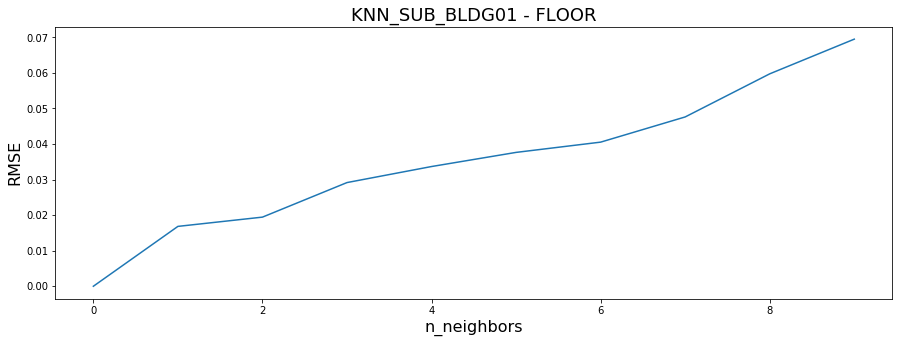

In [23]:
# plotting the rmse values against k values
KNN_SUB_BLDG01_FL_curveRMSE = pd.DataFrame(KNN_SUB_BLDG01_FL_rmse_val)
KNN_SUB_BLDG01_FL_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - FLOOR', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/09_KNN_SUB_BLDG01_FL_RMSE.png', bbox_inches='tight')

plt.show()

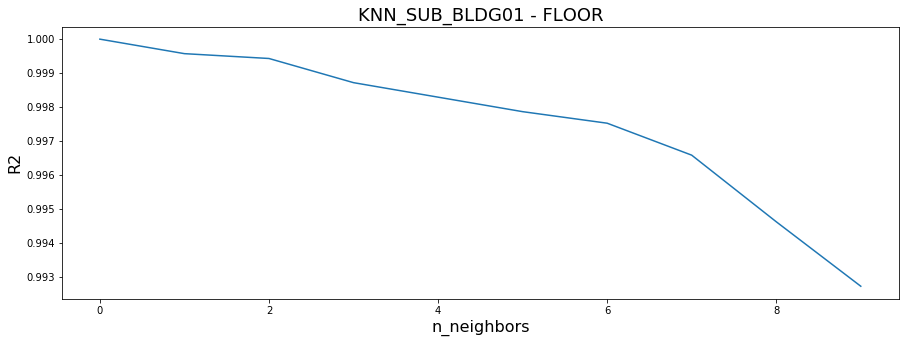

In [24]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_FL_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_FL_r2_val)
KNN_SUB_BLDG01_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/10_KNN_SUB_BLDG01_FL_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG01 - BUILDINGID

In [25]:
KNN_SUB_BLDG01_BLDG_start = timeit.default_timer()

KNN_SUB_BLDG01_BLDG_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG01_BLDG_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG01_BLDG in range(10):
    KNN_SUB_BLDG01_BLDG = KNN_SUB_BLDG01_BLDG + 1
    KNN_SUB_BLDG01_BLDG_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG01_BLDG)

    KNN_SUB_BLDG01_BLDG_model.fit(X_KNN_SUB_BLDG01_BLDG_train, y_KNN_SUB_BLDG01_BLDG_train)  #fit the model
    KNN_SUB_BLDG01_BLDG_pred = KNN_SUB_BLDG01_BLDG_model.predict(X_KNN_SUB_BLDG01_BLDG_test) #make prediction on test set
    KNN_SUB_BLDG01_BLDG_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG01_BLDG_test, KNN_SUB_BLDG01_BLDG_pred)) #calculate rmse
    KNN_SUB_BLDG01_BLDG_r2 = r2_score(y_KNN_SUB_BLDG01_BLDG_test, KNN_SUB_BLDG01_BLDG_pred)
    KNN_SUB_BLDG01_BLDG_rmse_val.append(KNN_SUB_BLDG01_BLDG_error) #store rmse values
    KNN_SUB_BLDG01_BLDG_r2_val.append(KNN_SUB_BLDG01_BLDG_r2) #store r2 values

    print('Value (BLDG) for k=',KNN_SUB_BLDG01_BLDG,'is:')    
    print('RMSE   :', KNN_SUB_BLDG01_BLDG_error)
    print('Rsqaure:', KNN_SUB_BLDG01_BLDG_r2)
    
KNN_SUB_BLDG01_BLDG_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG01_BLDG_t = (KNN_SUB_BLDG01_BLDG_stop - KNN_SUB_BLDG01_BLDG_start)/60
print('Time in min: ', round(KNN_SUB_BLDG01_BLDG_t, 3))

Value (BLDG) for k= 1 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 2 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 3 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 4 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 5 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 6 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 7 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 8 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 9 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 10 is:
RMSE   : 0.0
Rsqaure: 1.0

Time in min:  0.094


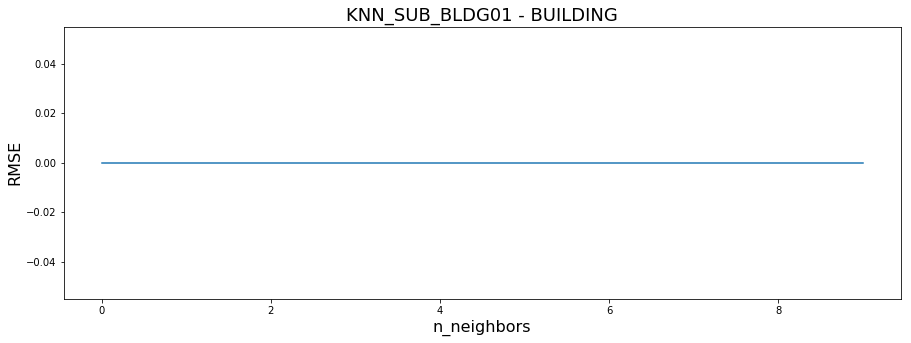

In [26]:
# plotting the rmse values against k values
KNN_SUB_BLDG01_BLDG_curveRMSE = pd.DataFrame(KNN_SUB_BLDG01_BLDG_rmse_val)
KNN_SUB_BLDG01_BLDG_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - BUILDING', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/11_KNN_SUB_BLDG01_BLDG_RMSE.png', bbox_inches='tight')

plt.show()

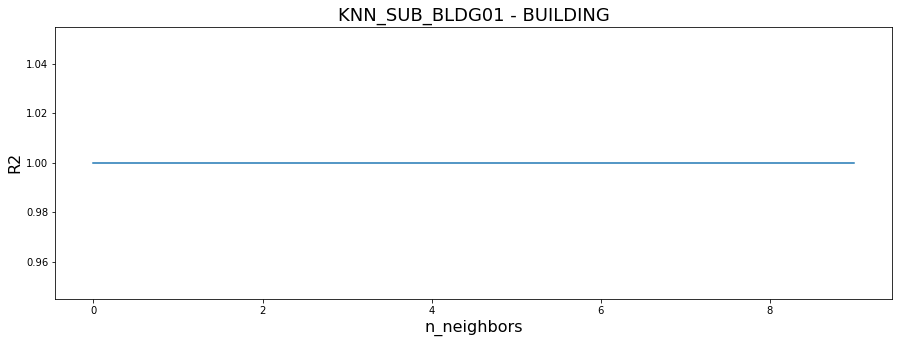

In [27]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_BLDG_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_BLDG_r2_val)
KNN_SUB_BLDG01_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/12_KNN_SUB_BLDG01_BLDG_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG01 - ABSOLUTE_LONGITUDE

In [28]:
KNN_SUB_BLDG01_LON_start = timeit.default_timer()

KNN_SUB_BLDG01_LON_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG01_LON_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG01_LON in range(10):
    KNN_SUB_BLDG01_LON = KNN_SUB_BLDG01_LON + 1
    KNN_SUB_BLDG01_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG01_LON)

    KNN_SUB_BLDG01_LON_model.fit(X_KNN_SUB_BLDG01_LON_train, y_KNN_SUB_BLDG01_LON_train)  #fit the model
    KNN_SUB_BLDG01_LON_pred = KNN_SUB_BLDG01_LON_model.predict(X_KNN_SUB_BLDG01_LON_test) #make prediction on test set
    KNN_SUB_BLDG01_LON_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG01_LON_test, KNN_SUB_BLDG01_LON_pred)) #calculate rmse
    KNN_SUB_BLDG01_LON_r2 = r2_score(y_KNN_SUB_BLDG01_LON_test, KNN_SUB_BLDG01_LON_pred)
    KNN_SUB_BLDG01_LON_rmse_val.append(KNN_SUB_BLDG01_LON_error) #store rmse values
    KNN_SUB_BLDG01_LON_r2_val.append(KNN_SUB_BLDG01_LON_r2) #store r2 values

    print('Value (LON) for k=',KNN_SUB_BLDG01_LON,'is:')    
    print('RMSE   :', KNN_SUB_BLDG01_LON_error)
    print('Rsqaure:', KNN_SUB_BLDG01_LON_r2)
    
KNN_SUB_BLDG01_LON_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG01_LON_t = (KNN_SUB_BLDG01_LON_stop - KNN_SUB_BLDG01_LON_start)/60
print('Time in min: ', round(KNN_SUB_BLDG01_LON_t, 3))

Value (LON) for k= 1 is:
RMSE   : 6.173146485472311
Rsqaure: 0.9821210306562188
Value (LON) for k= 2 is:
RMSE   : 5.641535356718487
Rsqaure: 0.9850677950209052
Value (LON) for k= 3 is:
RMSE   : 6.043792213548719
Rsqaure: 0.982862464634604
Value (LON) for k= 4 is:
RMSE   : 6.175171242263758
Rsqaure: 0.9821093003331243
Value (LON) for k= 5 is:
RMSE   : 6.40497553806993
Rsqaure: 0.9807529459800742
Value (LON) for k= 6 is:
RMSE   : 6.716038223487052
Rsqaure: 0.9788380524916678
Value (LON) for k= 7 is:
RMSE   : 6.949288401721943
Rsqaure: 0.9773426044952688
Value (LON) for k= 8 is:
RMSE   : 6.949045321160003
Rsqaure: 0.9773441895427694
Value (LON) for k= 9 is:
RMSE   : 6.994911603822149
Rsqaure: 0.9770441290003161
Value (LON) for k= 10 is:
RMSE   : 7.157851217218298
Rsqaure: 0.9759622038299341

Time in min:  0.094


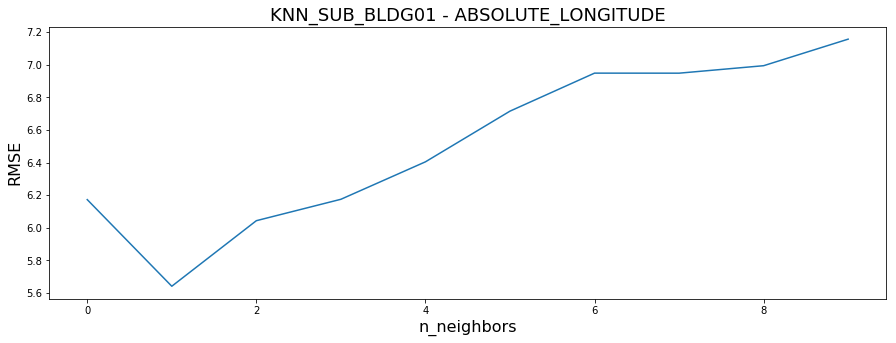

In [29]:
# plotting the rmse values against k values
KNN_SUB_BLDG01_LON_curveRMSE = pd.DataFrame(KNN_SUB_BLDG01_LON_rmse_val)
KNN_SUB_BLDG01_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/13_KNN_SUB_BLDG01_LON_RMSE.png', bbox_inches='tight')

plt.show()

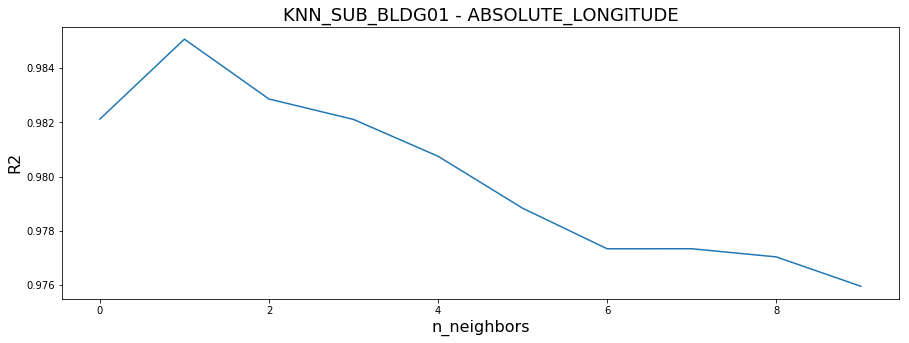

In [30]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_LON_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_LON_r2_val)
KNN_SUB_BLDG01_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/14_KNN_SUB_BLDG01_LON_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG01 - ABSOLUTE_LATITUDE

In [31]:
KNN_SUB_BLDG01_LAT_start = timeit.default_timer()

KNN_SUB_BLDG01_LAT_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG01_LAT_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG01_LAT in range(10):
    KNN_SUB_BLDG01_LAT = KNN_SUB_BLDG01_LAT + 1
    KNN_SUB_BLDG01_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG01_LAT)

    KNN_SUB_BLDG01_LAT_model.fit(X_KNN_SUB_BLDG01_LAT_train, y_KNN_SUB_BLDG01_LAT_train)  #fit the model
    KNN_SUB_BLDG01_LAT_pred = KNN_SUB_BLDG01_LAT_model.predict(X_KNN_SUB_BLDG01_LAT_test) #make prediction on test set
    KNN_SUB_BLDG01_LAT_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG01_LAT_test, KNN_SUB_BLDG01_LAT_pred)) #calculate rmse
    KNN_SUB_BLDG01_LAT_r2 = r2_score(y_KNN_SUB_BLDG01_LAT_test, KNN_SUB_BLDG01_LAT_pred)
    KNN_SUB_BLDG01_LAT_rmse_val.append(KNN_SUB_BLDG01_LAT_error) #store rmse values
    KNN_SUB_BLDG01_LAT_r2_val.append(KNN_SUB_BLDG01_LAT_r2) #store r2 values

    print('Value (KNN_SUB_BLDG01_LAT) for k=',KNN_SUB_BLDG01_LAT,'is:')    
    print('RMSE   :', KNN_SUB_BLDG01_LAT_error)
    print('Rsqaure:', KNN_SUB_BLDG01_LAT_r2)

KNN_SUB_BLDG01_LAT_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG01_LAT_t = (KNN_SUB_BLDG01_LAT_stop - KNN_SUB_BLDG01_LAT_start)/60
print('Time in min: ', round(KNN_SUB_BLDG01_LAT_t, 3))

Value (KNN_SUB_BLDG01_LAT) for k= 1 is:
RMSE   : 6.766640858971462
Rsqaure: 0.9630811302172514
Value (KNN_SUB_BLDG01_LAT) for k= 2 is:
RMSE   : 6.322772837647533
Rsqaure: 0.9677657699206698
Value (KNN_SUB_BLDG01_LAT) for k= 3 is:
RMSE   : 5.772495315101068
Rsqaure: 0.9731323722906596
Value (KNN_SUB_BLDG01_LAT) for k= 4 is:
RMSE   : 5.75595450259888
Rsqaure: 0.9732861275201545
Value (KNN_SUB_BLDG01_LAT) for k= 5 is:
RMSE   : 5.504721015317396
Rsqaure: 0.9755672264173311
Value (KNN_SUB_BLDG01_LAT) for k= 6 is:
RMSE   : 5.4439637887005965
Rsqaure: 0.9761035934028897
Value (KNN_SUB_BLDG01_LAT) for k= 7 is:
RMSE   : 5.533620369014545
Rsqaure: 0.9753100127181263
Value (KNN_SUB_BLDG01_LAT) for k= 8 is:
RMSE   : 5.720258976250532
Rsqaure: 0.9736164320671028
Value (KNN_SUB_BLDG01_LAT) for k= 9 is:
RMSE   : 5.7872516372208445
Rsqaure: 0.9729948324243305
Value (KNN_SUB_BLDG01_LAT) for k= 10 is:
RMSE   : 5.960852493723304
Rsqaure: 0.9713503781784881

Time in min:  0.095


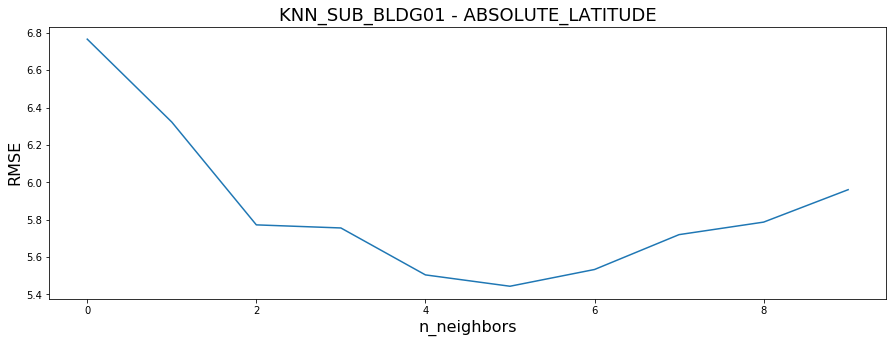

In [32]:
# plotting the rmse values against k values
KNN_SUB_BLDG01_LAT_curveRMSE = pd.DataFrame(KNN_SUB_BLDG01_LAT_rmse_val)
KNN_SUB_BLDG01_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/15_KNN_SUB_BLDG01_LAT_RMSE.png', bbox_inches='tight')

plt.show()

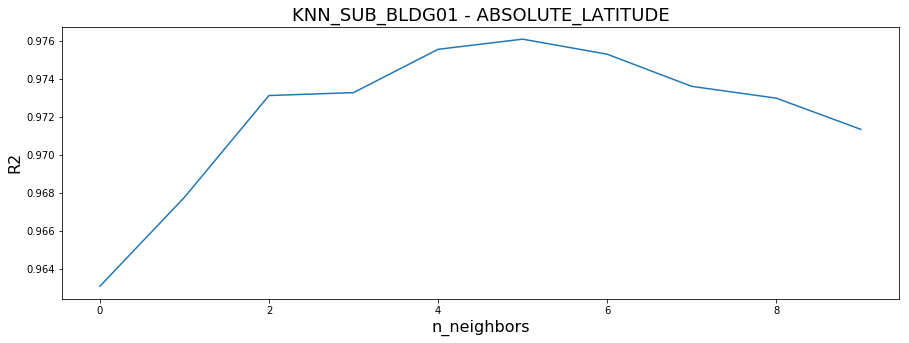

In [33]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_LAT_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_LAT_r2_val)
KNN_SUB_BLDG01_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/16_KNN_SUB_BLDG01_LAT_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG00_FL01 - Splitting

In [34]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_SUB_BLDG00_FL01_FL = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_FL = BLDG00_FL01_df_train.iloc[:, 384].values

X_KNN_SUB_BLDG00_FL01_BLDG = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_BLDG = BLDG00_FL01_df_train.iloc[:, 385].values

X_KNN_SUB_BLDG00_FL01_LON = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_LON = BLDG00_FL01_df_train.iloc[:, 386].values

X_KNN_SUB_BLDG00_FL01_LAT = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_LAT = BLDG00_FL01_df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_SUB_BLDG00_FL01_FL_train, X_KNN_SUB_BLDG00_FL01_FL_test, y_KNN_SUB_BLDG00_FL01_FL_train, y_KNN_SUB_BLDG00_FL01_FL_test = train_test_split(X_KNN_SUB_BLDG00_FL01_FL, y_KNN_SUB_BLDG00_FL01_FL, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG00_FL01_BLDG_train, X_KNN_SUB_BLDG00_FL01_BLDG_test, y_KNN_SUB_BLDG00_FL01_BLDG_train, y_KNN_SUB_BLDG00_FL01_BLDG_test = train_test_split(X_KNN_SUB_BLDG00_FL01_BLDG, y_KNN_SUB_BLDG00_FL01_BLDG, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG00_FL01_LON_train, X_KNN_SUB_BLDG00_FL01_LON_test, y_KNN_SUB_BLDG00_FL01_LON_train, y_KNN_SUB_BLDG00_FL01_LON_test = train_test_split(X_KNN_SUB_BLDG00_FL01_LON, y_KNN_SUB_BLDG00_FL01_LON, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG00_FL01_LAT_train, X_KNN_SUB_BLDG00_FL01_LAT_test, y_KNN_SUB_BLDG00_FL01_LAT_train, y_KNN_SUB_BLDG00_FL01_LAT_test = train_test_split(X_KNN_SUB_BLDG00_FL01_LAT, y_KNN_SUB_BLDG00_FL01_LAT, test_size=0.3, random_state=0)

#### KNN_SUB - BLDG00_FL01 - FLOOR

In [35]:
KNN_SUB_BLDG00_FL01_FL_start = timeit.default_timer()

KNN_SUB_BLDG00_FL01_FL_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG00_FL01_FL_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG00_FL01_FL in range(10):
    KNN_SUB_BLDG00_FL01_FL = KNN_SUB_BLDG00_FL01_FL + 1
    KNN_SUB_BLDG00_FL01_FL_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG00_FL01_FL)

    KNN_SUB_BLDG00_FL01_FL_model.fit(X_KNN_SUB_BLDG00_FL01_FL_train, y_KNN_SUB_BLDG00_FL01_FL_train)  #fit the model
    KNN_SUB_BLDG00_FL01_FL_pred = KNN_SUB_BLDG00_FL01_FL_model.predict(X_KNN_SUB_BLDG00_FL01_FL_test) #make prediction on test set
    KNN_SUB_BLDG00_FL01_FL_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG00_FL01_FL_test, KNN_SUB_BLDG00_FL01_FL_pred)) #calculate rmse
    KNN_SUB_BLDG00_FL01_FL_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_FL_test, KNN_SUB_BLDG00_FL01_FL_pred)
    KNN_SUB_BLDG00_FL01_FL_rmse_val.append(KNN_SUB_BLDG00_FL01_FL_error) #store rmse values
    KNN_SUB_BLDG00_FL01_FL_r2_val.append(KNN_SUB_BLDG00_FL01_FL_r2) #store r2 values

    print('Value (FL) for k=',KNN_SUB_BLDG00_FL01_FL,'is:')    
    print('RMSE   :', KNN_SUB_BLDG00_FL01_FL_error)
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_FL_r2)
    
KNN_SUB_BLDG00_FL01_FL_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG00_FL01_FL_t = (KNN_SUB_BLDG00_FL01_FL_stop - KNN_SUB_BLDG00_FL01_FL_start)/60
print('Time in min: ', round(KNN_SUB_BLDG00_FL01_FL_t, 3))

Value (FL) for k= 1 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 2 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 3 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 4 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 5 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 6 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 7 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 8 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 9 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (FL) for k= 10 is:
RMSE   : 0.0
Rsqaure: 1.0

Time in min:  0.007


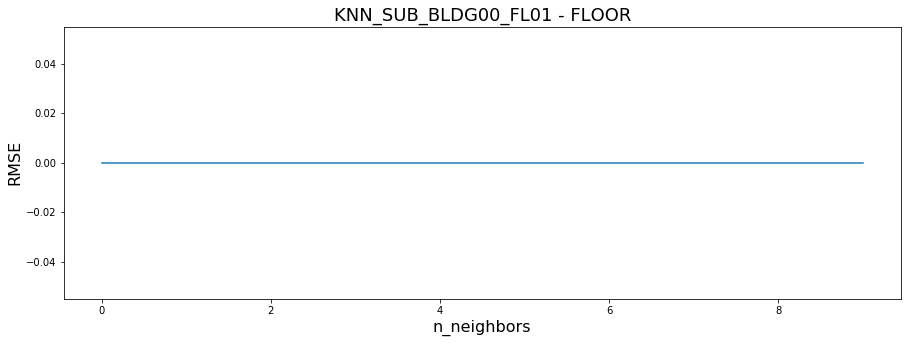

In [36]:
# plotting the rmse values against k values
KNN_SUB_BLDG00_FL01_FL_curveRMSE = pd.DataFrame(KNN_SUB_BLDG00_FL01_FL_rmse_val)
KNN_SUB_BLDG00_FL01_FL_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - FLOOR', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/17_KNN_SUB_BLDG00_FL01_FL_RMSE.png', bbox_inches='tight')

plt.show()

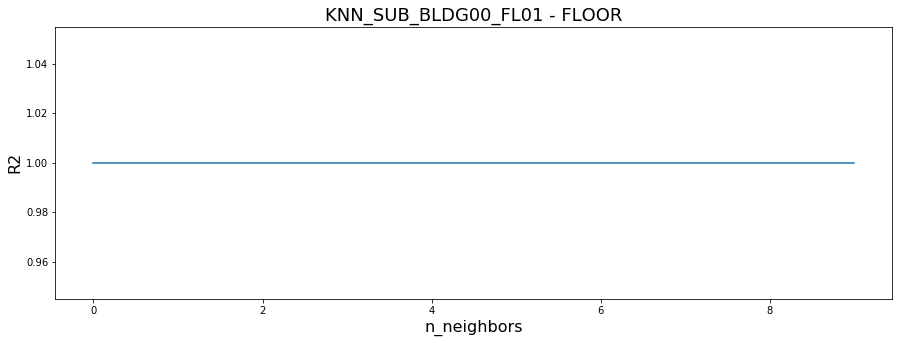

In [37]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_FL_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_FL_r2_val)
KNN_SUB_BLDG00_FL01_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/18_KNN_SUB_BLDG00_FL01_FL_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG00_FL01 - BUILDINGID

In [38]:
KNN_SUB_BLDG00_FL01_BLDG_start = timeit.default_timer()

KNN_SUB_BLDG00_FL01_BLDG_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG00_FL01_BLDG_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG00_FL01_BLDG in range(10):
    KNN_SUB_BLDG00_FL01_BLDG = KNN_SUB_BLDG00_FL01_BLDG + 1
    KNN_SUB_BLDG00_FL01_BLDG_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG00_FL01_BLDG)

    KNN_SUB_BLDG00_FL01_BLDG_model.fit(X_KNN_SUB_BLDG00_FL01_BLDG_train, y_KNN_SUB_BLDG00_FL01_BLDG_train)  #fit the model
    KNN_SUB_BLDG00_FL01_BLDG_pred = KNN_SUB_BLDG00_FL01_BLDG_model.predict(X_KNN_SUB_BLDG00_FL01_BLDG_test) #make prediction on test set
    KNN_SUB_BLDG00_FL01_BLDG_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG00_FL01_BLDG_test, KNN_SUB_BLDG00_FL01_BLDG_pred)) #calculate rmse
    KNN_SUB_BLDG00_FL01_BLDG_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_BLDG_test, KNN_SUB_BLDG00_FL01_BLDG_pred)
    KNN_SUB_BLDG00_FL01_BLDG_rmse_val.append(KNN_SUB_BLDG00_FL01_BLDG_error) #store rmse values
    KNN_SUB_BLDG00_FL01_BLDG_r2_val.append(KNN_SUB_BLDG00_FL01_BLDG_r2) #store r2 values

    print('Value (BLDG) for k=',KNN_SUB_BLDG00_FL01_BLDG,'is:')    
    print('RMSE   :', KNN_SUB_BLDG00_FL01_BLDG_error)
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_BLDG_r2)
    
KNN_SUB_BLDG00_FL01_BLDG_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG00_FL01_BLDG_t = (KNN_SUB_BLDG00_FL01_BLDG_stop - KNN_SUB_BLDG00_FL01_BLDG_start)/60
print('Time in min: ', round(KNN_SUB_BLDG00_FL01_BLDG_t, 3))

Value (BLDG) for k= 1 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 2 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 3 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 4 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 5 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 6 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 7 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 8 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 9 is:
RMSE   : 0.0
Rsqaure: 1.0
Value (BLDG) for k= 10 is:
RMSE   : 0.0
Rsqaure: 1.0

Time in min:  0.007


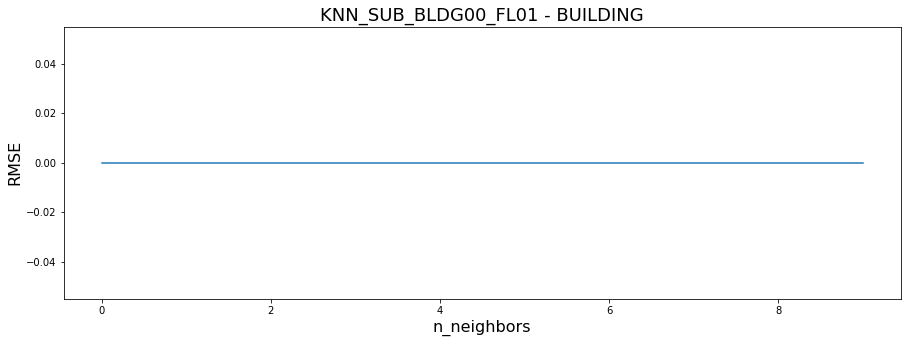

In [39]:
# plotting the rmse values against k values
KNN_SUB_BLDG00_FL01_BLDG_curveRMSE = pd.DataFrame(KNN_SUB_BLDG00_FL01_BLDG_rmse_val)
KNN_SUB_BLDG00_FL01_BLDG_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - BUILDING', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/19_KNN_SUB_BLDG00_FL01_BLDG_RMSE.png', bbox_inches='tight')

plt.show()

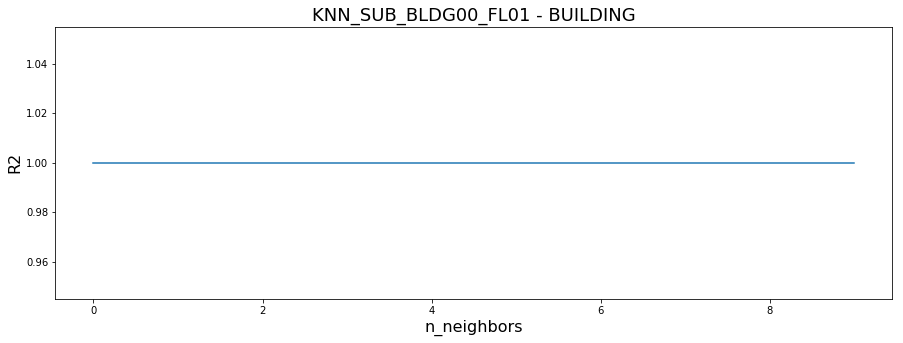

In [40]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_BLDG_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_BLDG_r2_val)
KNN_SUB_BLDG00_FL01_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/20_KNN_SUB_BLDG00_FL01_BLDG_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG00_FL01 - ABSOLUTE_LONGITUDE

In [41]:
KNN_SUB_BLDG00_FL01_LON_start = timeit.default_timer()

KNN_SUB_BLDG00_FL01_LON_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG00_FL01_LON_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG00_FL01_LON in range(10):
    KNN_SUB_BLDG00_FL01_LON = KNN_SUB_BLDG00_FL01_LON + 1
    KNN_SUB_BLDG00_FL01_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG00_FL01_LON)

    KNN_SUB_BLDG00_FL01_LON_model.fit(X_KNN_SUB_BLDG00_FL01_LON_train, y_KNN_SUB_BLDG00_FL01_LON_train)  #fit the model
    KNN_SUB_BLDG00_FL01_LON_pred = KNN_SUB_BLDG00_FL01_LON_model.predict(X_KNN_SUB_BLDG00_FL01_LON_test) #make prediction on test set
    KNN_SUB_BLDG00_FL01_LON_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG00_FL01_LON_test, KNN_SUB_BLDG00_FL01_LON_pred)) #calculate rmse
    KNN_SUB_BLDG00_FL01_LON_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_LON_test, KNN_SUB_BLDG00_FL01_LON_pred)
    KNN_SUB_BLDG00_FL01_LON_rmse_val.append(KNN_SUB_BLDG00_FL01_LON_error) #store rmse values
    KNN_SUB_BLDG00_FL01_LON_r2_val.append(KNN_SUB_BLDG00_FL01_LON_r2) #store r2 values

    print('Value (LON) for k=',KNN_SUB_BLDG00_FL01_LON,'is:')    
    print('RMSE   :', KNN_SUB_BLDG00_FL01_LON_error)
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_LON_r2)
    
KNN_SUB_BLDG00_FL01_LON_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG00_FL01_LON_t = (KNN_SUB_BLDG00_FL01_LON_stop - KNN_SUB_BLDG00_FL01_LON_start)/60
print('Time in min: ', round(KNN_SUB_BLDG00_FL01_LON_t, 3))

Value (LON) for k= 1 is:
RMSE   : 1.8174413280987534
Rsqaure: 0.9951170230247622
Value (LON) for k= 2 is:
RMSE   : 1.8971723134363463
Rsqaure: 0.9946791938898554
Value (LON) for k= 3 is:
RMSE   : 1.9184015931979739
Rsqaure: 0.9945594484433482
Value (LON) for k= 4 is:
RMSE   : 2.1154404361465913
Rsqaure: 0.9933844572472572
Value (LON) for k= 5 is:
RMSE   : 2.2448315158829977
Rsqaure: 0.9925504270185781
Value (LON) for k= 6 is:
RMSE   : 2.378301643285522
Rsqaure: 0.9916382390182723
Value (LON) for k= 7 is:
RMSE   : 2.555268958207602
Rsqaure: 0.9903475598921584
Value (LON) for k= 8 is:
RMSE   : 2.7956623350655097
Rsqaure: 0.9884459748609863
Value (LON) for k= 9 is:
RMSE   : 2.8953067549150995
Rsqaure: 0.9876076678716782
Value (LON) for k= 10 is:
RMSE   : 3.0215164435396504
Rsqaure: 0.9865037286467944

Time in min:  0.007


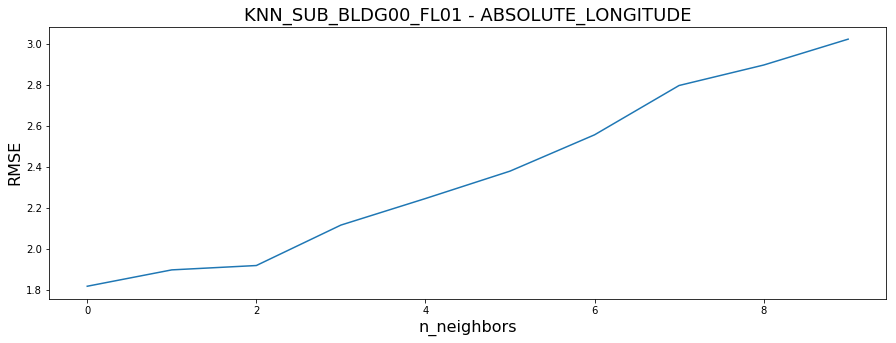

In [42]:
# plotting the rmse values against k values
KNN_SUB_BLDG00_FL01_LON_curveRMSE = pd.DataFrame(KNN_SUB_BLDG00_FL01_LON_rmse_val)
KNN_SUB_BLDG00_FL01_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/21_KNN_SUB_BLDG00_FL01_LON_RMSE.png', bbox_inches='tight')

plt.show()

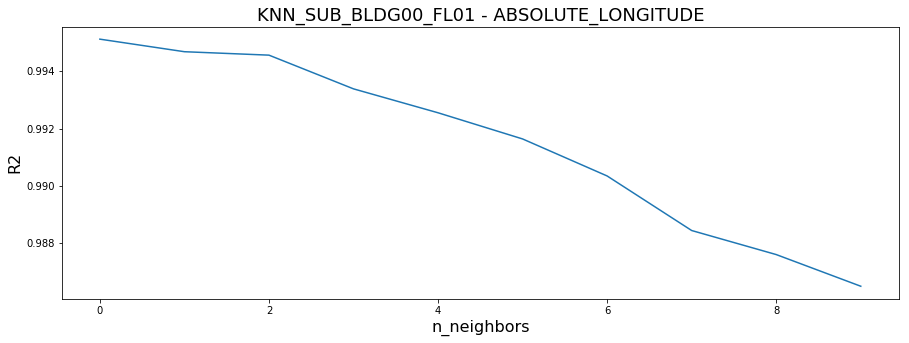

In [43]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_LON_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_LON_r2_val)
KNN_SUB_BLDG00_FL01_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/22_KNN_SUB_BLDG00_FL01_LON_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG00_FL01 - ABSOLUTE_LATITUDE

In [44]:
KNN_SUB_BLDG00_FL01_LAT_start = timeit.default_timer()

KNN_SUB_BLDG00_FL01_LAT_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG00_FL01_LAT_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG00_FL01_LAT in range(10):
    KNN_SUB_BLDG00_FL01_LAT = KNN_SUB_BLDG00_FL01_LAT + 1
    KNN_SUB_BLDG00_FL01_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG00_FL01_LAT)

    KNN_SUB_BLDG00_FL01_LAT_model.fit(X_KNN_SUB_BLDG00_FL01_LAT_train, y_KNN_SUB_BLDG00_FL01_LAT_train)  #fit the model
    KNN_SUB_BLDG00_FL01_LAT_pred = KNN_SUB_BLDG00_FL01_LAT_model.predict(X_KNN_SUB_BLDG00_FL01_LAT_test) #make prediction on test set
    KNN_SUB_BLDG00_FL01_LAT_error = sqrt(mean_squared_error(y_KNN_SUB_BLDG00_FL01_LAT_test, KNN_SUB_BLDG00_FL01_LAT_pred)) #calculate rmse
    KNN_SUB_BLDG00_FL01_LAT_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_LAT_test, KNN_SUB_BLDG00_FL01_LAT_pred)
    KNN_SUB_BLDG00_FL01_LAT_rmse_val.append(KNN_SUB_BLDG00_FL01_LAT_error) #store rmse values
    KNN_SUB_BLDG00_FL01_LAT_r2_val.append(KNN_SUB_BLDG00_FL01_LAT_r2) #store r2 values

    print('Value (KNN_SUB_BLDG00_FL01_LAT) for k=',KNN_SUB_BLDG00_FL01_LAT,'is:')    
    print('RMSE   :', KNN_SUB_BLDG00_FL01_LAT_error)
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_LAT_r2)

KNN_SUB_BLDG00_FL01_LAT_stop = timeit.default_timer()
print ()
KNN_SUB_BLDG00_FL01_LAT_t = (KNN_SUB_BLDG00_FL01_LAT_stop - KNN_SUB_BLDG00_FL01_LAT_start)/60
print('Time in min: ', round(KNN_SUB_BLDG00_FL01_LAT_t, 3))

Value (KNN_SUB_BLDG00_FL01_LAT) for k= 1 is:
RMSE   : 1.528270699914848
Rsqaure: 0.9976284490931602
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 2 is:
RMSE   : 1.7202836741065906
Rsqaure: 0.9969950862335208
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 3 is:
RMSE   : 1.682462083704465
Rsqaure: 0.9971257638384214
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 4 is:
RMSE   : 1.8304117600035212
Rsqaure: 0.9965980378882814
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 5 is:
RMSE   : 1.9166813591476213
Rsqaure: 0.9962698034511127
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 6 is:
RMSE   : 2.0975446160537623
Rsqaure: 0.9955326056320256
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 7 is:
RMSE   : 2.243869746563921
Rsqaure: 0.9948875724793619
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 8 is:
RMSE   : 2.445530702365683
Rsqaure: 0.9939273518774785
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 9 is:
RMSE   : 2.540486070535854
Rsqaure: 0.9934466175497075
Value (KNN_SUB_BLDG00_FL01_LAT) for k= 10 is:
RMSE   : 2.751859500265481
Rsqaure: 0.992310742745

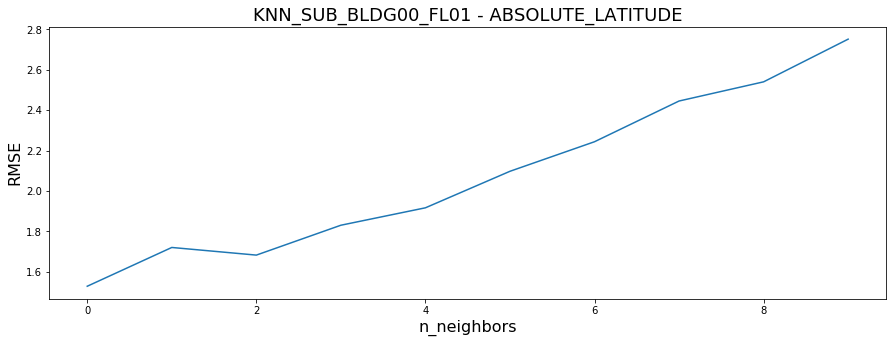

In [45]:
# plotting the rmse values against k values
KNN_SUB_BLDG00_FL01_LAT_curveRMSE = pd.DataFrame(KNN_SUB_BLDG00_FL01_LAT_rmse_val)
KNN_SUB_BLDG00_FL01_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/23_KNN_SUB_BLDG00_FL01_LAT_RMSE.png', bbox_inches='tight')

plt.show()

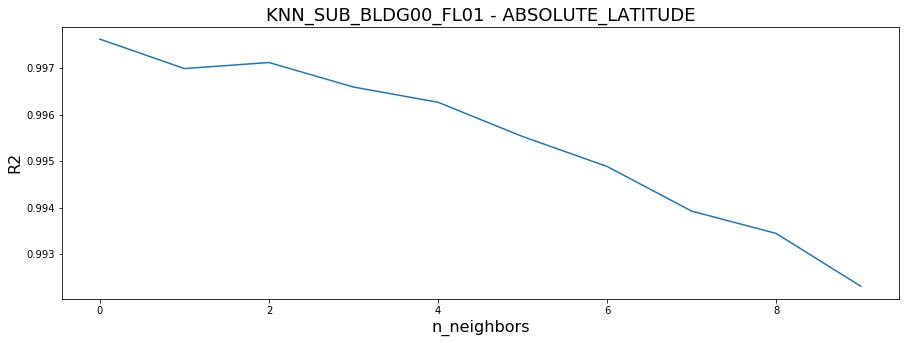

In [46]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_LAT_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_LAT_r2_val)
KNN_SUB_BLDG00_FL01_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/24_KNN_SUB_BLDG00_FL01_LAT_r2.png', bbox_inches='tight')

plt.show()